In [31]:
import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [32]:
model = keras.models.load_model('../model/location.keras')

In [33]:
def predict(sample_images):
    # Predict labels
    predicted = model.predict(sample_images)
    predicted_labels = np.argmax(predicted, axis=1)

    class_dict = {0:'T-shirt',1:'pants',2:'pullover',3:'shoes',4:'Bag'}
    # Display images and predictions
    fig, axes = plt.subplots(1, len(sample_images), figsize=(20, 2))
    for i, ax in enumerate(axes):
        ax.imshow(sample_images[i].reshape(28, 28), cmap='gray')
        ax.set_title(f'{class_dict.get(predicted_labels[i])}')
        ax.axis('off')
    plt.show()

In [34]:
def resize_image(image, new_size):
    height, width = image.shape[:2]

    scale_x = new_size[0] / width
    scale_y = new_size[1] / height

    scale = min(scale_x, scale_y)

    new_width = int(width * scale)
    new_height = int(height * scale)

    resized_image = cv2.resize(image, (new_width, new_height))

    final_image = np.zeros((new_size[1], new_size[0]), dtype=np.uint8)

    x = (new_size[0] - new_width) // 2
    y = (new_size[1] - new_height) // 2

    final_image[y:y+new_height, x:x+new_width] = resized_image

    return final_image


In [35]:
n = 5
sample_images = []
rows_up = [0, 63, 125, 20, 80, 72]
rows_down = [0, 44, 0, 90, 30, 36]
columns_up = [0, 150, 160, 235, 145, 105]
columns_down = [0, 118, 110, 35, 125, 165]

for i in range(1, n + 1):
    im_gray = cv2.imread(f'../datasets/box{i}/output_image{i}-1.jpg', cv2.IMREAD_GRAYSCALE)
    cv2.imwrite(f'../datasets/box{i}/output_image{i}-1_gray_scale.jpg', im_gray)
    
    height, width = im_gray.shape
    im_gray_crop = im_gray[rows_up[i]:height - rows_down[i], columns_up[i]:width - columns_down[i]]
    cv2.imwrite(f'../datasets/box{i}/output_image{i}-1_gray_scale_crop.jpg', im_gray_crop)

    im_gray_crop_resize = resize_image(im_gray_crop, (28, 28))
    cv2.imwrite(f'../datasets/box{i}/output_image{i}-1_gray_scale_crop_resize.jpg', im_gray_crop_resize)
    
    sample_images.append(im_gray_crop_resize)

1/1 [==============================] - 0s 176ms/step


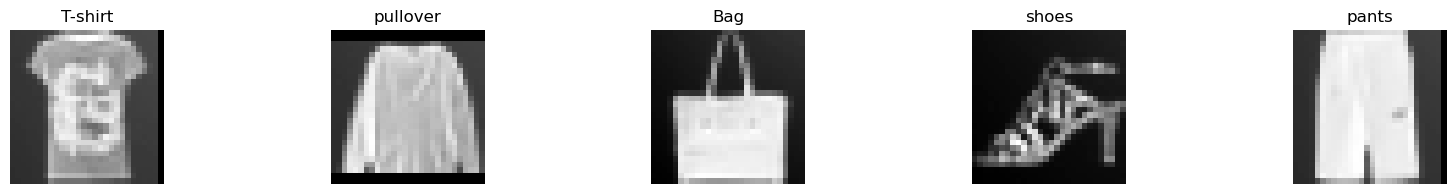

In [36]:
predict(np.array(sample_images))